<a href="https://colab.research.google.com/github/ChristyJeyaPriya/yulu/blob/main/Yulu_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


In [ ]:
df = pd.read_csv("yulu_dataset.csv")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df.shape

(10886, 12)

In [ ]:
#df.describe()
temp_max = df["temp"].max()
temp_min = df["temp"].min()
temp_bins = [(temp_min -1),temp_max*(1/3), temp_max*(2/3), temp_max]
temp_var = ["low", "med", "high"]
df["temp_bins"] = pd.cut(df["temp"],bins =temp_bins,labels = temp_var)


In [ ]:
humidity_max = df["humidity"].max()
humidity_min = df["humidity"].min()
humidity_bins = [humidity_min -1 ,humidity_max*(1/3), humidity_max*(2/3), humidity_max]
humidity_var = ["low", "med", "high"]
df["humidity_bins"] = pd.cut(df["humidity"],bins =humidity_bins,labels = humidity_var)

In [ ]:
df["humidity_bins"].value_counts()

humidity_bins
med     5600
high    4546
low      740
Name: count, dtype: int64

In [ ]:
windspeed_max = df["windspeed"].max()
windspeed_min = df["windspeed"].min()
windspeed_bins = [windspeed_min-1, windspeed_max*(1/3), windspeed_max*(2/3), windspeed_max]
windspeed_var = ["low", "med", "high"]
df["windspeed_bins"] = pd.cut(df["windspeed"],bins =windspeed_bins,labels = windspeed_var)


In [ ]:
atemp_max = df["atemp"].max()
atemp_min = df["atemp"].min()
atemp_bins = [atemp_min-1,atemp_max*(1/3), atemp_max*(2/3), atemp_max]
atemp_var = ["low", "med", "high"]
df["atemp_bins"] = pd.cut(df["atemp"],bins =atemp_bins,labels = atemp_var)


In [ ]:
df[["atemp_bins", "temp_bins", "windspeed_bins", "humidity_bins", "season", "workingday","weather", "count"]].head()

,atemp_bins,temp_bins,windspeed_bins,humidity_bins,season,workingday,weather,count
0,low,low,low,high,1,0,1,16
1,low,low,low,high,1,0,1,40
2,low,low,low,high,1,0,1,32
3,low,low,low,high,1,0,1,13
4,low,low,low,high,1,0,1,1


In [ ]:
df["atemp_bins"].unique()

['low', 'med', 'high']
Categories (3, object): ['low' < 'med' < 'high']

In [ ]:
df[df["casual"] == 0]["count"].count()

986

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_bins,humidity_bins,windspeed_bins,atemp_bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,low,high,low,low
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,low,high,low,low
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,low,high,low,low
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,low,high,low,low
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,low,high,low,low


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include = ["object"])

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'temp_bins', 'humidity_bins', 'windspeed_bins', 'atemp_bins'],
      dtype='object')

In [ ]:
df.dtypes

datetime                  object
season                     int64
holiday                    int64
workingday                 int64
weather                    int64
temp                     float64
atemp                    float64
humidity                   int64
windspeed                float64
casual                     int64
registered                 int64
count                      int64
temp_bins               category
humidity_bins           category
windspeed_bins          category
atemp_bins              category
date_time         datetime64[ns]
dtype: object

In [ ]:
df.drop(columns= {"datetime"}, inplace = True, axis = 1)

In [ ]:
from scipy.stats import ttest_ind #two sample t test
df_workingday_1 = df[df["workingday"]==1]["count"] # 1 -- hoiliday or weekend
df_workingday_0 = df[df["workingday"]==0]["count"] # 0 -- weekday
ttest_ind(df_workingday_1, df_workingday_0)
#df_workingday_1

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

In [ ]:
df["date_time"] = pd.to_datetime(df["datetime"])

#df["date_time"] = df["datetime"].astype(str)

In [ ]:
df["date_time"]

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: date_time, Length: 10886, dtype: object

In [ ]:
#df["date_time"] = pd.to_datetime[df["date_time"]]

TypeError: 'function' object is not subscriptable

<Axes: >

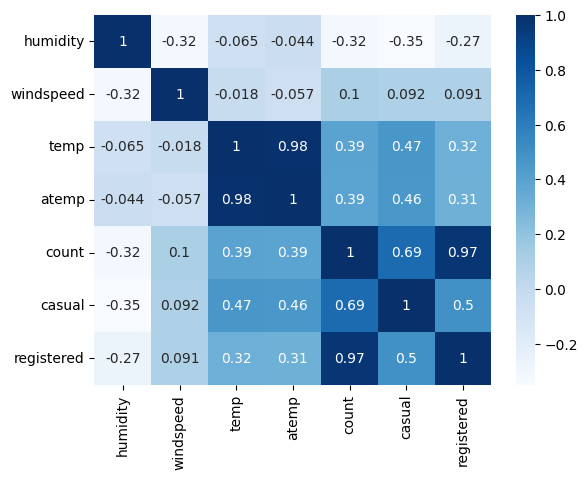

In [ ]:
sns.heatmap(df[[ "humidity","windspeed", "temp", "atemp", "count", "casual", "registered"]].corr(), annot = True, cmap ="Blues")

In [ ]:
sns.boxplot("")

In [ ]:
df.duplicated().sum()

0

<Axes: xlabel='season', ylabel='Count'>

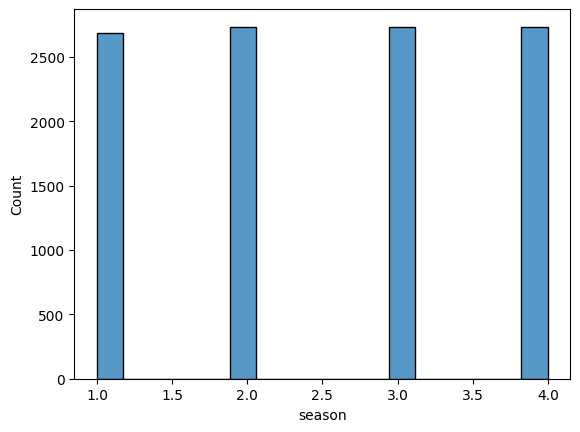

In [ ]:
sns.histplot(x="season", data = df)

<Axes: xlabel='weather', ylabel='Count'>

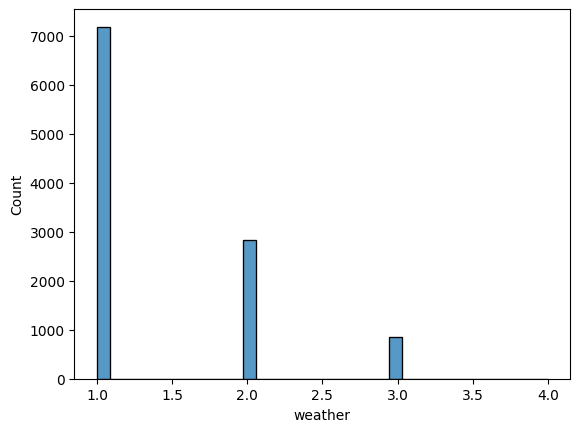

In [ ]:
sns.histplot(x= "weather", data =df)

<Axes: xlabel='windspeed', ylabel='Count'>

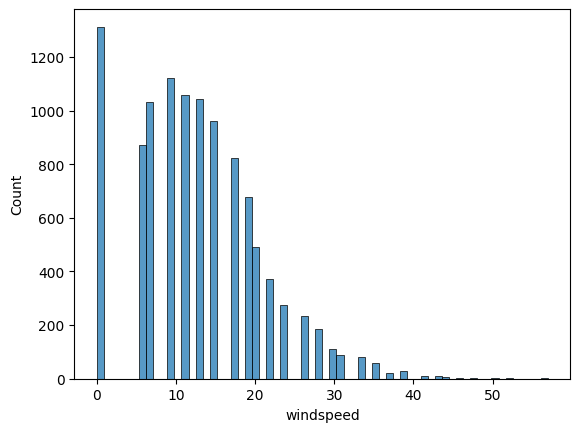

In [ ]:
sns.histplot(x= "windspeed", data = df)

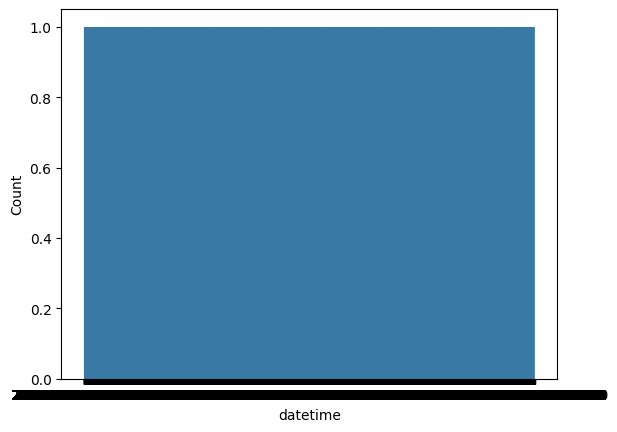

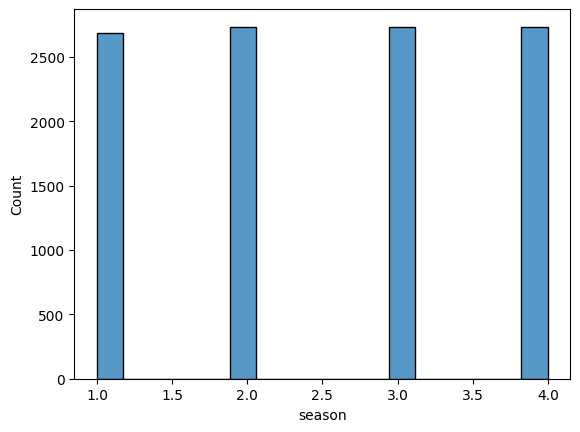

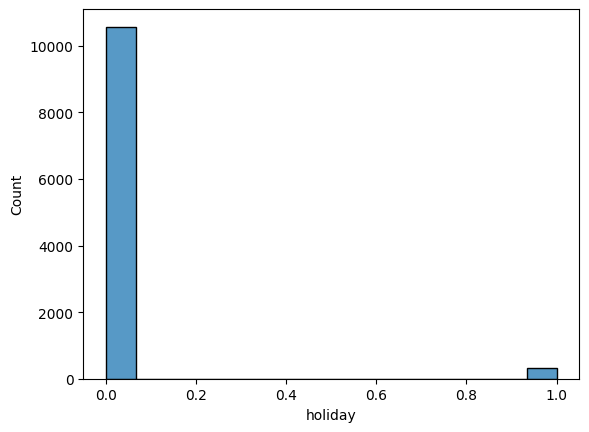

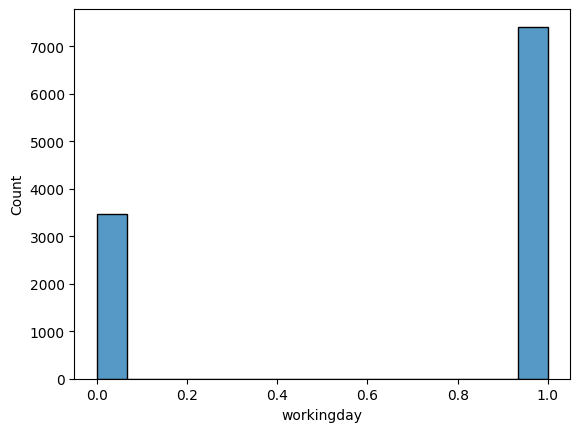

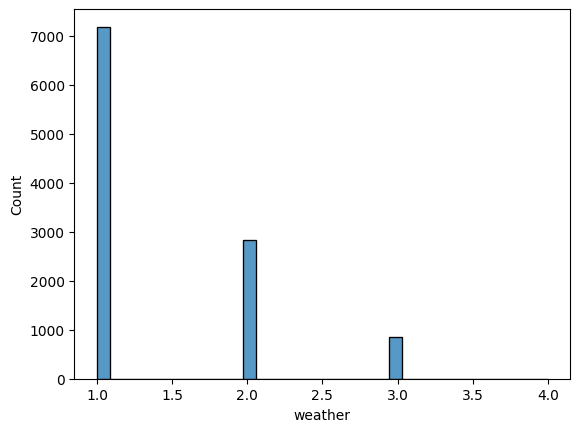

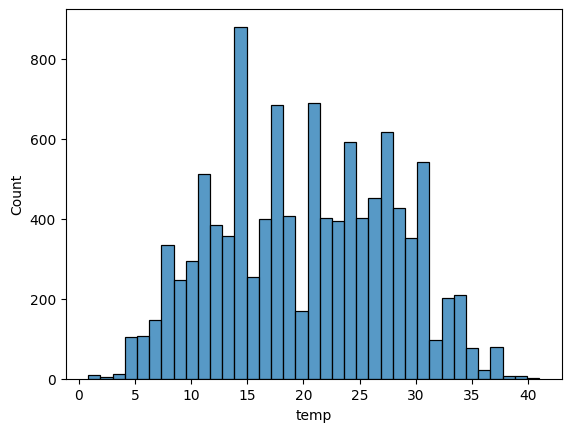

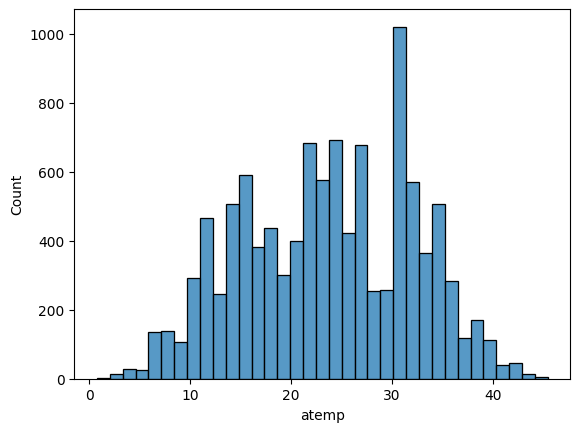

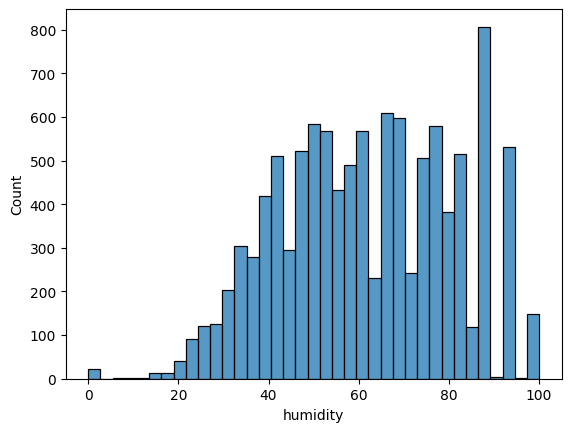

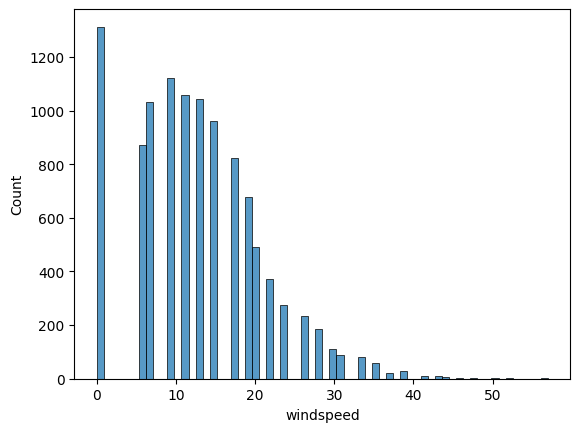

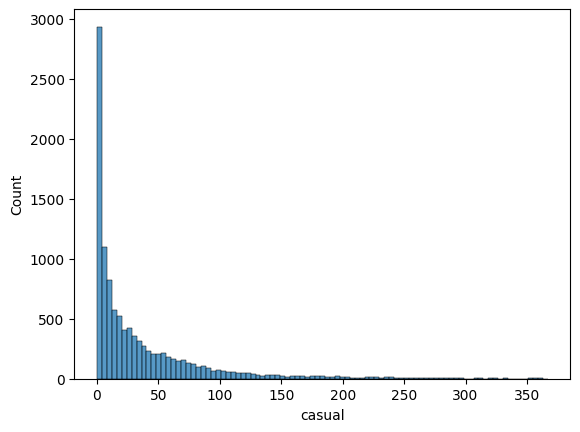

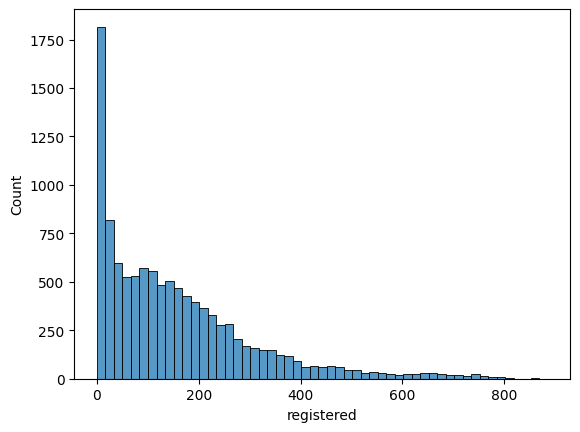

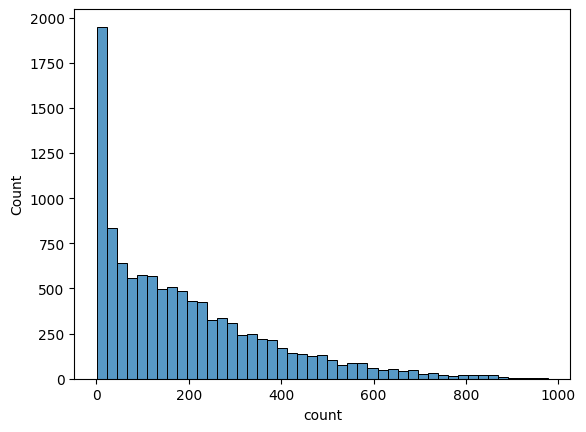

In [ ]:
import matplotlib.pyplot as plt

for i in df.columns:
  sns.histplot(x =i, data = df)
  plt.show()


In [ ]:
df["holiday"].unique()

array([0, 1])

In [ ]:
df["casual"].unique()

array([  3,   8,   5,   0,   2,   1,  12,  26,  29,  47,  35,  40,  41,
        15,   9,   6,  11,   4,   7,  16,  20,  19,  10,  13,  14,  18,
        17,  21,  33,  23,  22,  28,  48,  52,  42,  24,  30,  27,  32,
        58,  62,  51,  25,  31,  59,  45,  73,  55,  68,  34,  38, 102,
        84,  39,  36,  43,  46,  60,  80,  83,  74,  37,  70,  81, 100,
        99,  54,  88,  97, 144, 149, 124,  98,  50,  72,  57,  71,  67,
        95,  90, 126, 174, 168, 170, 175, 138,  92,  56, 111,  89,  69,
       139, 166, 219, 240, 147, 148,  78,  53,  63,  79, 114,  94,  85,
       128,  93, 121, 156, 135, 103,  44,  49,  64,  91, 119, 167, 181,
       179, 161, 143,  75,  66, 109, 123, 113,  65,  86,  82, 132, 129,
       196, 142, 122, 106,  61, 107, 120, 195, 183, 206, 158, 137,  76,
       115, 150, 188, 193, 180, 127, 154, 108,  96, 110, 112, 169, 131,
       176, 134, 162, 153, 210, 118, 141, 146, 159, 178, 177, 136, 215,
       198, 248, 225, 194, 237, 242, 235, 224, 236, 222,  77,  8

<Axes: xlabel='windspeed_bins', ylabel='count'>

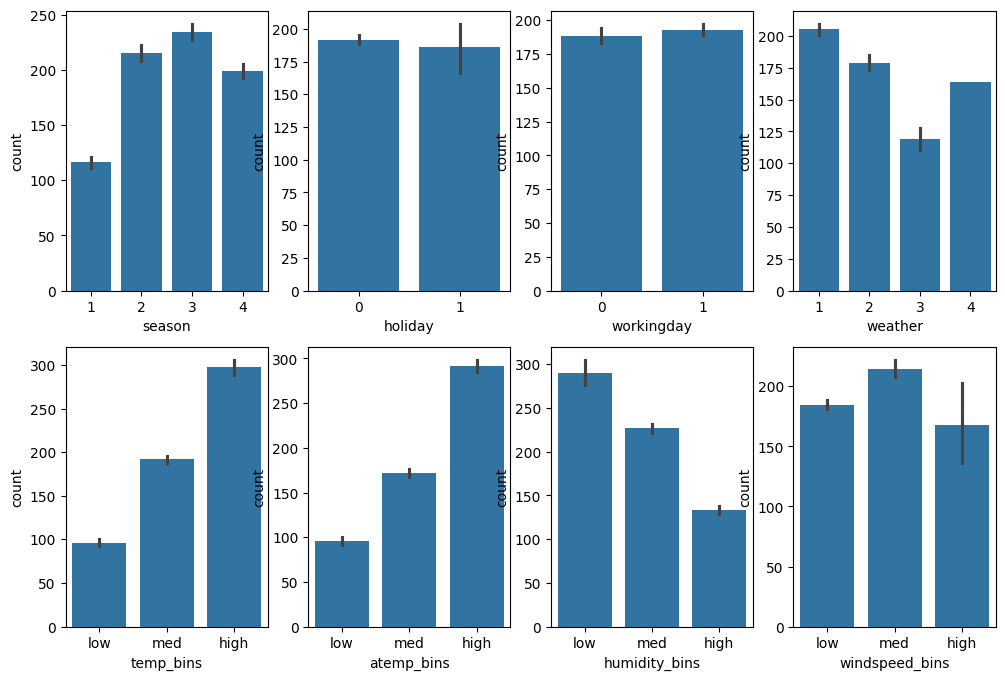

In [ ]:
#Bivariant Analysis

plt.figure(figsize= (12,8))
plt.subplot(2,4,1)
sns.barplot(x="season", y ="count", data =df)

plt.subplot(2,4,2)
sns.barplot(x="holiday", y ="count",data =df)

plt.subplot(2,4,3)
sns.barplot(x="workingday", y ="count",data =df)

plt.subplot(2,4,4)
sns.barplot(x="weather", y ="count",data =df)

plt.subplot(2,4,5)
sns.barplot(x="temp_bins", y ="count",data =df)

plt.subplot(2,4,6)
sns.barplot(x="atemp_bins", y ="count",data =df)

plt.subplot(2,4,7)
sns.barplot(x="humidity_bins", y ="count",data =df)

plt.subplot(2,4,8)
sns.barplot(x="windspeed_bins", y ="count",data =df)

# convert temp,atemp, windspeed, humidity to categorical and then plot

In [ ]:
df["count"].skew()

1.2420662117180776

In [ ]:
df["count"].kurt()

1.3000929518398334

<Axes: xlabel='count', ylabel='Count'>

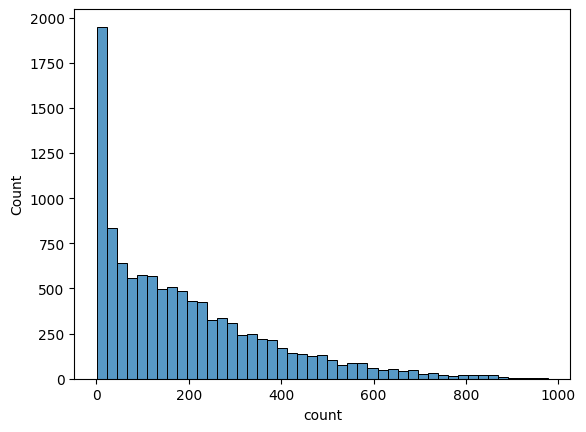

In [ ]:
sns.histplot(df["count"])

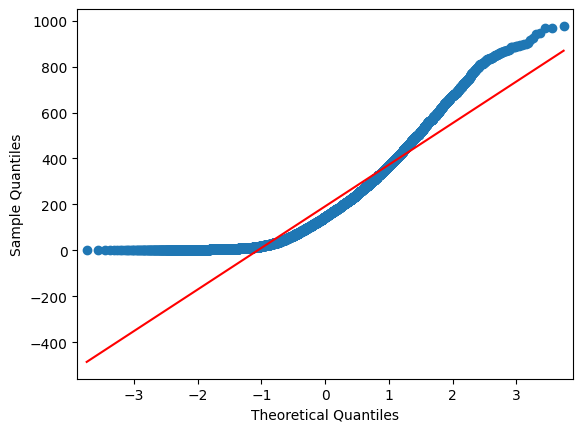

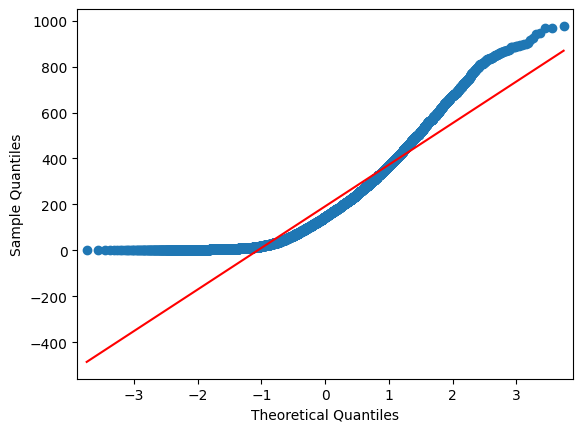

In [ ]:
import statsmodels.api as sm
sm.qqplot(df["count"], line='s')

# df["count"] is not linear

In [ ]:
from scipy.stats import shapiro
shapiro(df["count"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)

In [ ]:
from scipy.stats import levene

data1 = df[df["weather"]==1]["count"]
data2 = df[df["weather"]==2]["count"]
data3 = df[df["weather"]==3]["count"]
data4 = df[df["weather"]==4]["count"]
levene(data1, data2,data3,data4)


LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

In [ ]:
from scipy.stats import f_oneway
f_oneway(data1, data2,data3,data4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [ ]:
from scipy.stats import kruskal
kruskal(data1, data2,data3,data4)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

KeyError: "None of [Index([(16, 40, 32, 13, 1, 1, 2, 3, 8, 14, 36, 56, 84, 94, 106, 110, 93, 67, 35, 37, 36, 34, 28, 39, 17, 17, 9, 6, 3, 2, 1, 8, 20, 53, 70, 93, 75, 59, 74, 76, 65, 53, 30, 22, 31, 9, 8, 5, 2, 1, 3, 30, 64, 154, 88, 44, 51, 61, 61, 77, 72, 76, 157, 157, 110, 52, 52, 20, 12, 5, 2, 1, 2, 4, 36, 94, 179, 100, 42, 57, 78, 97, 63, 65, 83, 212, 182, 112, 54, 48, 35, 11, 6, 6, 2, 2, 3, 33, 88, 195, ...)], dtype='object')] are in the [columns]"

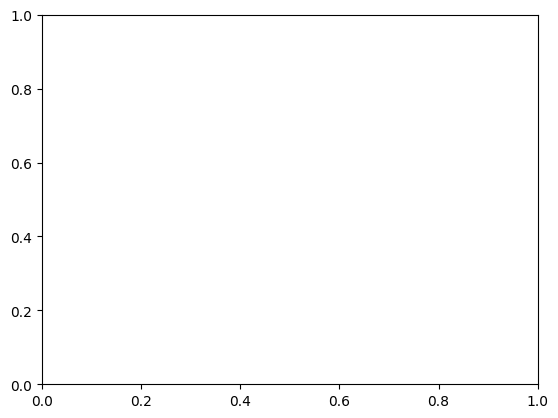

In [ ]:
df.boxplot(df["count"])

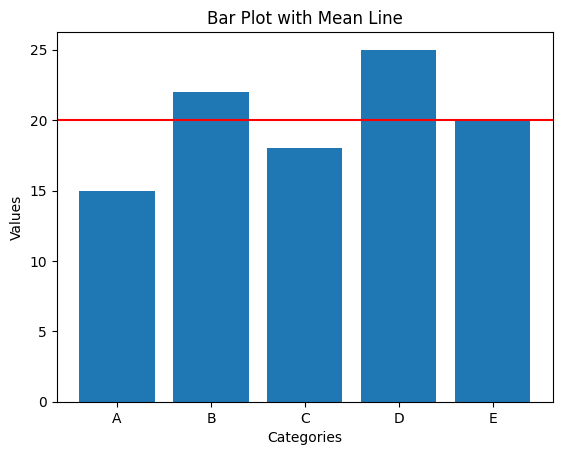

In [ ]:
from scipy.stats import pearsonr, spearmanr

#pearsonr(df_hw["Height"], df_hw["Weight"])
#spearmanr(df_hw["Height"], df_hw["Weight"])


<Axes: xlabel='temp', ylabel='count'>

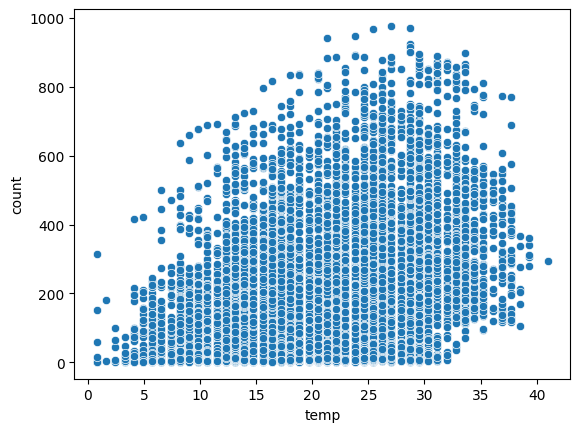

In [ ]:
sns.scatterplot(x ="temp", y ="count", data = df)

In [ ]:
df[["temp", "count"]].corr()

,temp,count
temp,1.000000,0.394454
count,0.394454,1.000000


In [ ]:
spearmanr(df["temp"], df["count"])

SignificanceResult(statistic=0.40798939475098117, pvalue=0.0)

<Axes: xlabel='season', ylabel='registered'>

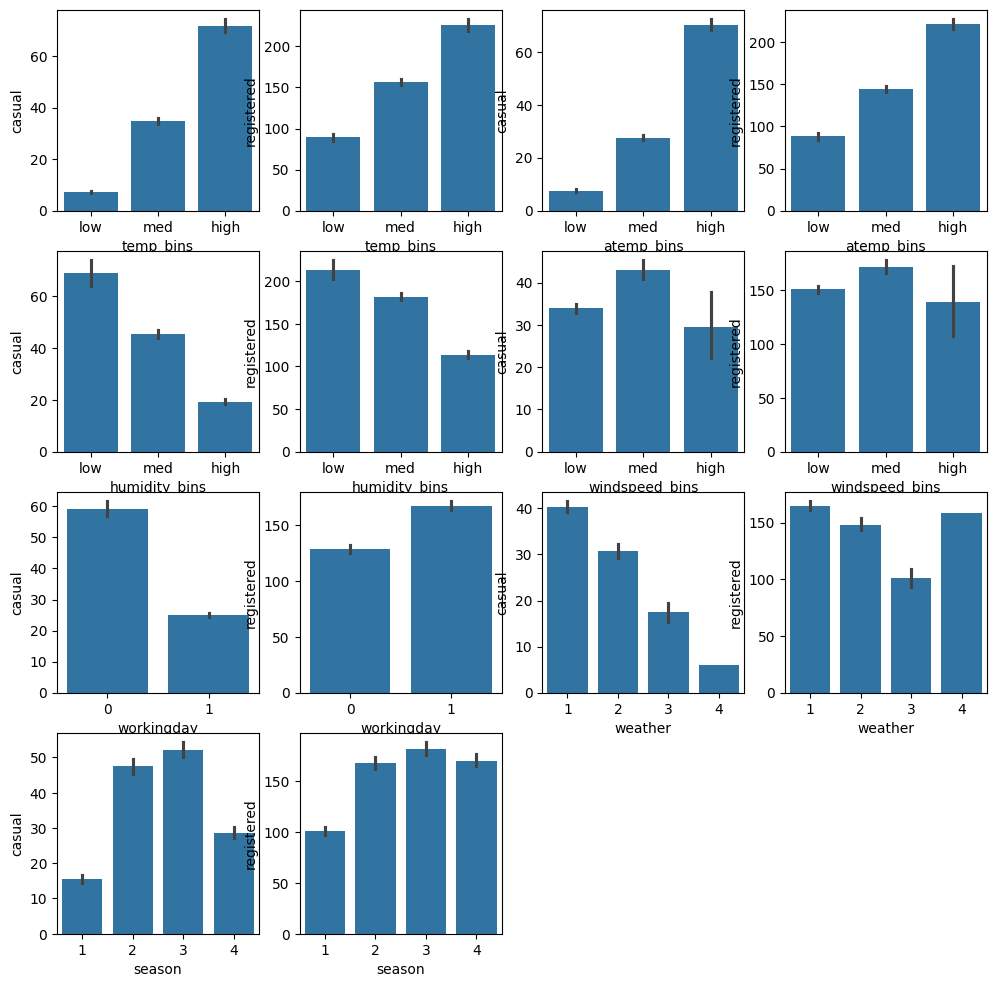

In [ ]:
plt.figure(figsize= (12,12))

plt.subplot(4,4,1)
sns.barplot(x="temp_bins", y ="casual", data = df)
plt.subplot(4,4,2)
sns.barplot(x="temp_bins", y ="registered", data = df)

plt.subplot(4,4,3)
sns.barplot(x="atemp_bins", y ="casual", data = df)
plt.subplot(4,4,4)
sns.barplot(x="atemp_bins", y ="registered", data = df)

plt.subplot(4,4,5)
sns.barplot(x="humidity_bins", y ="casual", data = df)
plt.subplot(4,4,6)
sns.barplot(x="humidity_bins", y ="registered", data = df)

plt.subplot(4,4,7)
sns.barplot(x="windspeed_bins", y ="casual", data = df)
plt.subplot(4,4,8)
sns.barplot(x="windspeed_bins", y ="registered", data = df)

plt.subplot(4,4,9)
sns.barplot(x="workingday", y ="casual", data = df)
plt.subplot(4,4,10)
sns.barplot(x="workingday", y ="registered", data = df)

plt.subplot(4,4,11)
sns.barplot(x="weather", y ="casual", data = df)
plt.subplot(4,4,12)
sns.barplot(x="weather", y ="registered", data = df)

plt.subplot(4,4,13)
sns.barplot(x="season", y ="casual", data = df)
plt.subplot(4,4,14)
sns.barplot(x="season", y ="registered", data = df)


In [ ]:
df_holiday = df[df["workingday"] == 1]["count"] # holiday or weekend
df_workingday = df[df["workingday"] == 0]["count"] # weekday

<Axes: xlabel='count', ylabel='Count'>

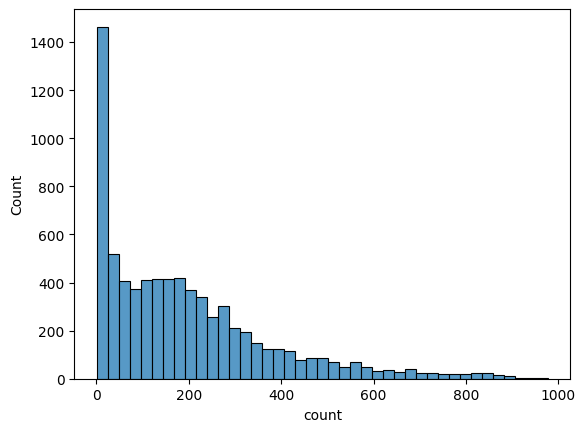

In [ ]:
sns.histplot(df_holiday)

<Axes: xlabel='count', ylabel='Count'>

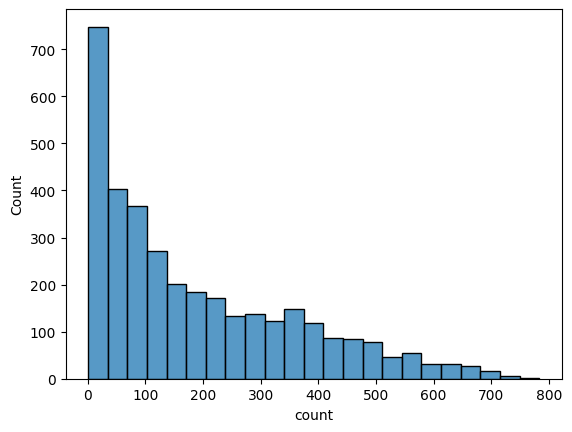

In [ ]:
sns.histplot(df_workingday)

In [ ]:
statistic, pvalue = ttest_ind(df_workingday, df_holiday)
print(pvalue)

0.22644804226361348


In [ ]:

alpha = 0.05 # Significance level
if pvalue < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"

print(decision)

Fail to reject the null hypothesis


In [ ]:
df_holiday = df[df["workingday"] == 1]["casual"] # holiday or weekend
df_workingday = df[df["workingday"] == 0]["casual"] # weekday

statistic, pvalue = ttest_ind(df_workingday, df_holiday)
print(pvalue)

alpha = 0.05 # Significance level
if pvalue < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"

print(decision)

3.56196742360544e-256
Reject the null hypothesis


In [ ]:
df_clear = df[df["weather"] == 1]["count"]
df_mist = df[df["weather"] == 2]["count"]
df_lightsnow_lightrain = df[df["weather"] == 3]["count"]
df_heavyrain_thunderstorm = df[df["weather"] == 4]["count"]

Text(0.5, 1.0, 'Heavy rain and thunderstorm')

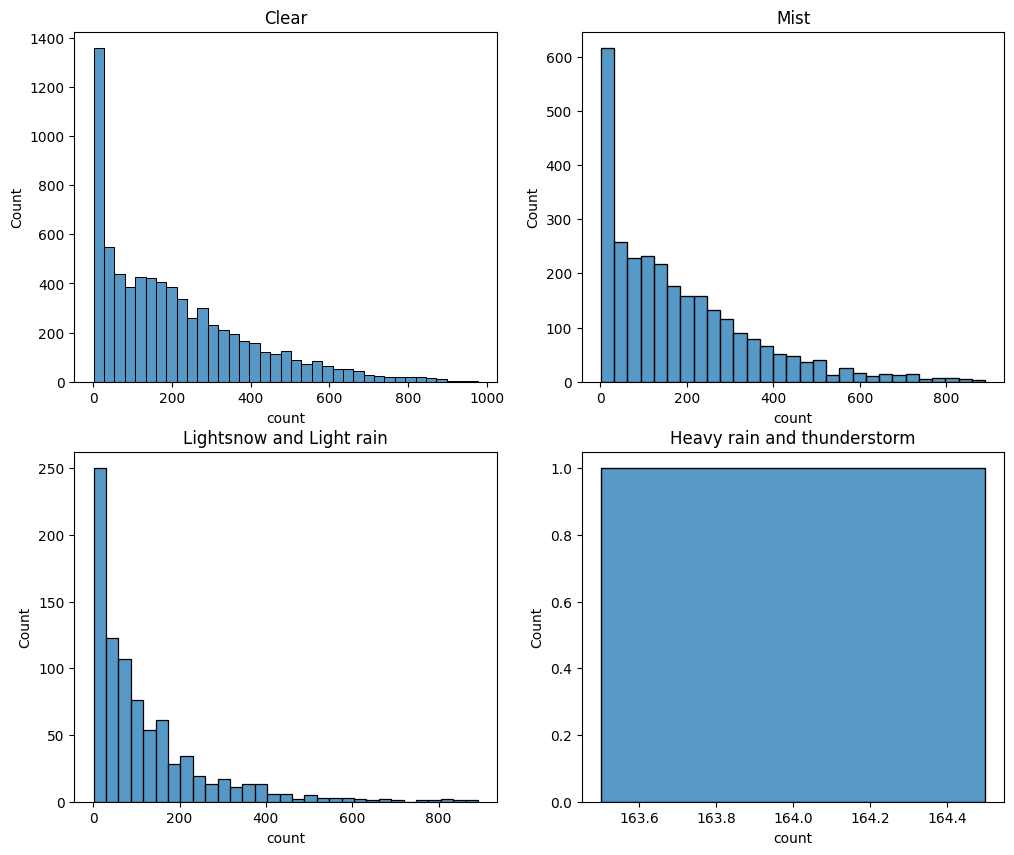

In [ ]:
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.histplot(df_clear)
plt.title("Clear")

plt.subplot(2,2,2)
sns.histplot(df_mist)
plt.title("Mist")

plt.subplot(2,2,3)
sns.histplot(df_lightsnow_lightrain)
plt.title("Lightsnow and Light rain")

plt.subplot(2,2,4)
sns.histplot(df_heavyrain_thunderstorm)
plt.title("Heavy rain and thunderstorm")

In [ ]:
df_heavyrain_thunderstorm.count()

1

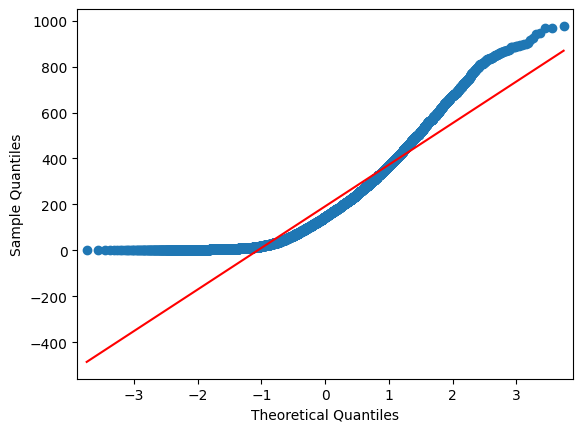

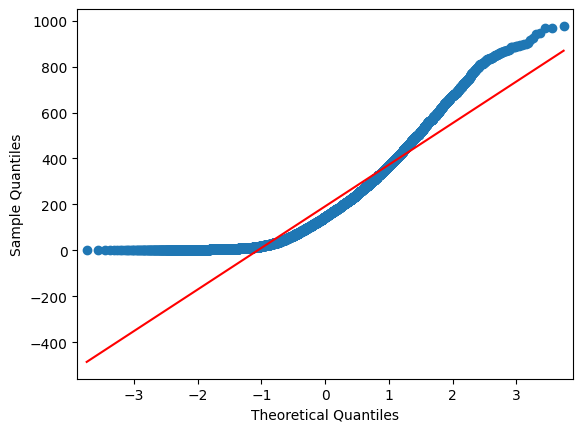

In [ ]:
 sm.qqplot(df["count"], line='s')

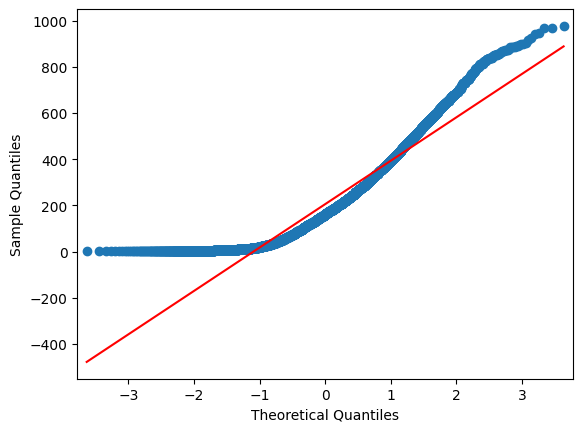

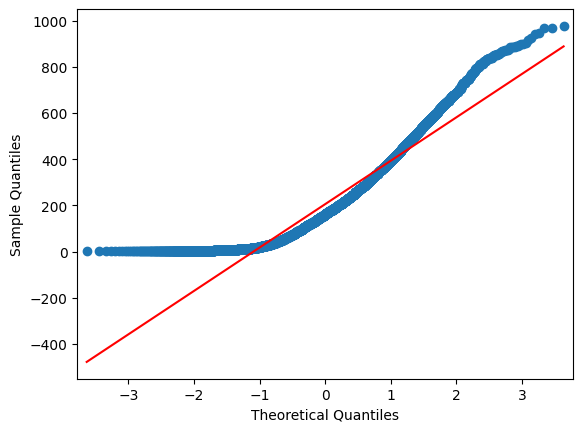

In [ ]:
 sm.qqplot(df_clear , line='s')

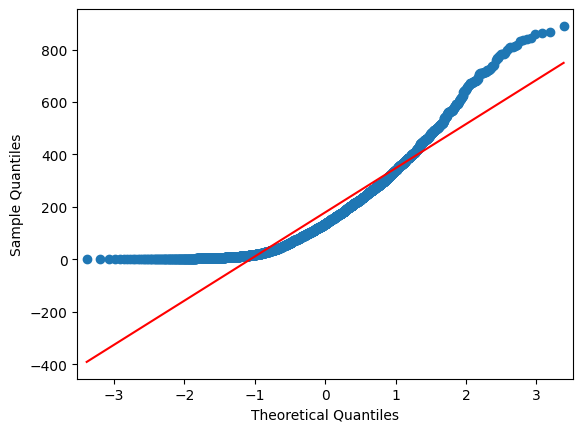

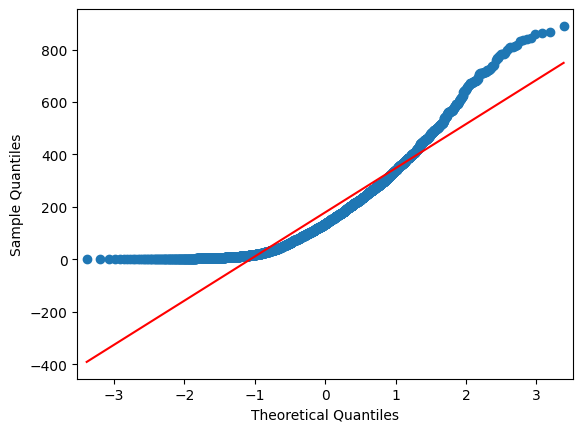

In [ ]:
 sm.qqplot(df_mist, line='s')

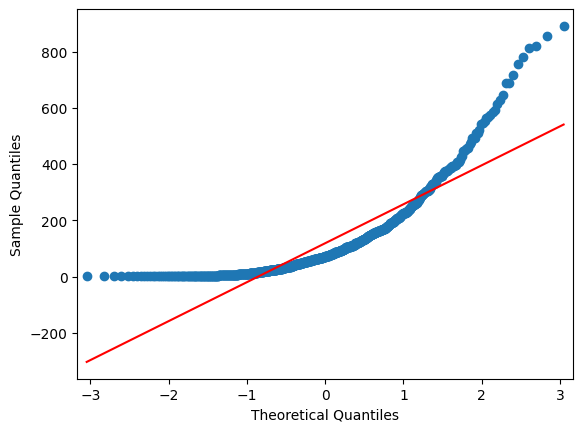

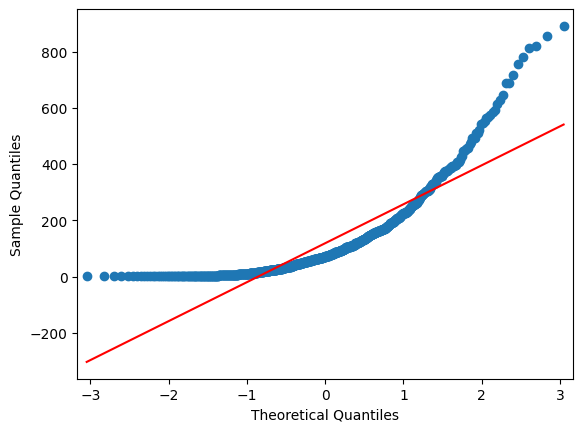

In [ ]:
 sm.qqplot(df_lightsnow_lightrain, line='s')

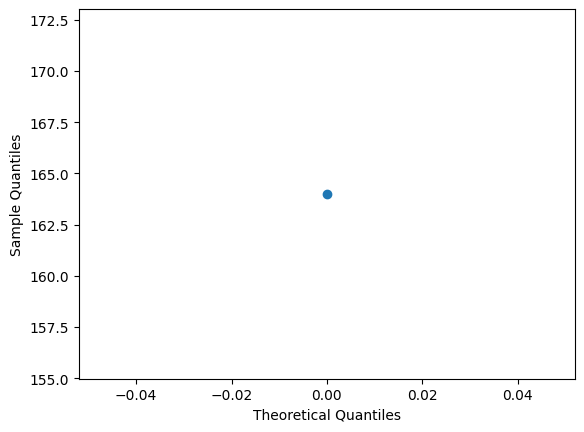

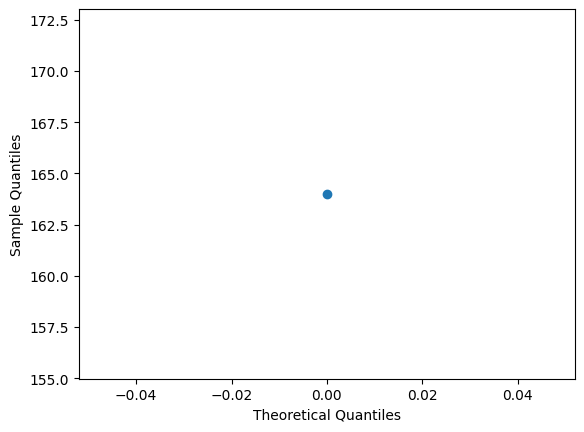

In [ ]:
 sm.qqplot(df_heavyrain_thunderstorm, line='s')

In [ ]:
from scipy.stats import shapiro
print(shapiro(df["count"]))
print(shapiro(df_clear))
print(shapiro(df_mist ))
print(shapiro(df_lightsnow_lightrain))
print(shapiro(df_heavyrain_thunderstorm))

ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)
ShapiroResult(statistic=0.8909230828285217, pvalue=0.0)
ShapiroResult(statistic=0.8767687082290649, pvalue=9.781063280987223e-43)
ShapiroResult(statistic=0.7674332857131958, pvalue=3.876090133422781e-33)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: Data must be at least length 3.

In [ ]:
print(shapiro(df["count"]))

ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)


<Axes: xlabel='count', ylabel='Count'>

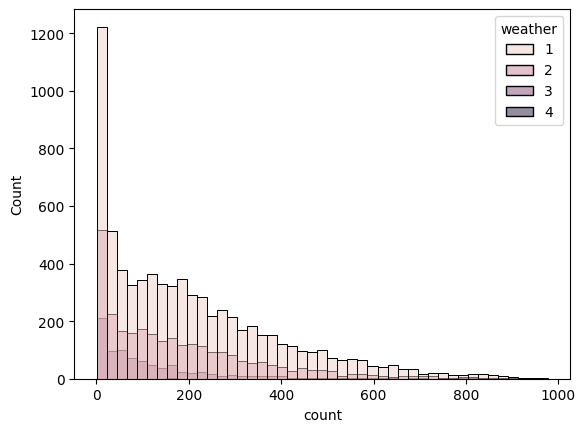

In [ ]:
sns.histplot(data = df, x = "count", hue ="weather")

In [ ]:
from scipy.stats import levene
levene(df_clear , df_mist , df_lightsnow_lightrain, df_heavyrain_thunderstorm )

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

In [ ]:
stat, p_value = f_oneway(df_clear , df_mist , df_lightsnow_lightrain, df_heavyrain_thunderstorm )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"

print(decision)

5.482069475935669e-42
Reject the null hypothesis


In [ ]:
from scipy.stats import kruskal
stat, p_value = kruskal(df_clear , df_mist , df_lightsnow_lightrain, df_heavyrain_thunderstorm )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

1.6853366233576997e-61
Reject the null hypothesis


In [ ]:
df_clear = df[df["weather"] == 1]["registered"]
df_mist = df[df["weather"] == 2]["registered"]
df_lightsnow_lightrain = df[df["weather"] == 3]["registered"]
df_heavyrain_thunderstorm = df[df["weather"] == 4]["registered"]

In [ ]:
stat, p_value = f_oneway(df_clear , df_mist , df_lightsnow_lightrain, df_heavyrain_thunderstorm )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"

print(decision)

3.3100209801972467e-44
Reject the null hypothesis


In [ ]:

stat, p_value = kruskal(df_clear , df_mist , df_lightsnow_lightrain, df_heavyrain_thunderstorm )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

1.6853366233576997e-61
Reject the null hypothesis


In [ ]:
df_clear = df[df["weather"] == 1]["casual"]
df_mist = df[df["weather"] == 2]["casual"]
df_lightsnow_lightrain = df[df["weather"] == 3]["casual"]
df_heavyrain_thunderstorm = df[df["weather"] == 4]["casual"]

In [ ]:
stat, p_value = f_oneway(df_clear , df_mist , df_lightsnow_lightrain, df_heavyrain_thunderstorm )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"

print(decision)

3.3100209801972467e-44
Reject the null hypothesis


In [ ]:
stat, p_value = kruskal(df_clear , df_mist , df_lightsnow_lightrain, df_heavyrain_thunderstorm )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

1.6853366233576997e-61
Reject the null hypothesis


In [ ]:
#season (1: spring, 2: summer, 3: fall, 4: winter)
df_spring = df[df["season"] ==1]["count"]
df_summer = df[df["season"] ==2]["count"]
df_fall = df[df["season"] ==3]["count"]
df_winter = df[df["season"] ==4]["count"]

<Axes: xlabel='count', ylabel='Count'>

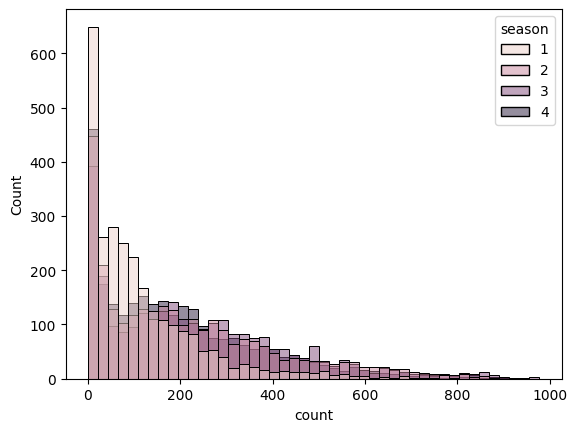

In [ ]:
sns.histplot(data = df, x = "count", hue = "season")

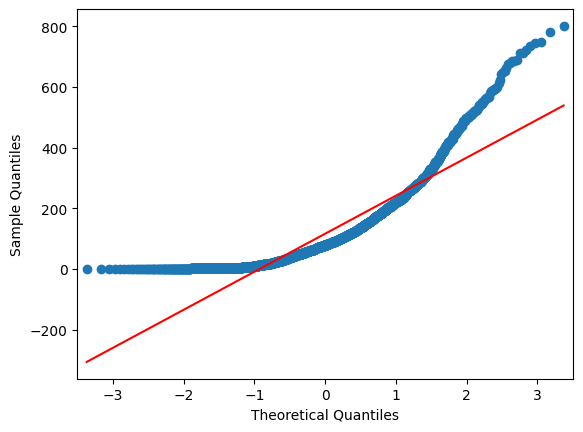

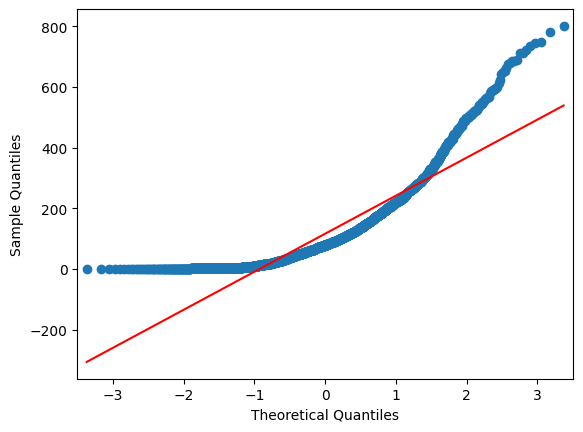

In [ ]:
sm.qqplot(df_spring, line='s')

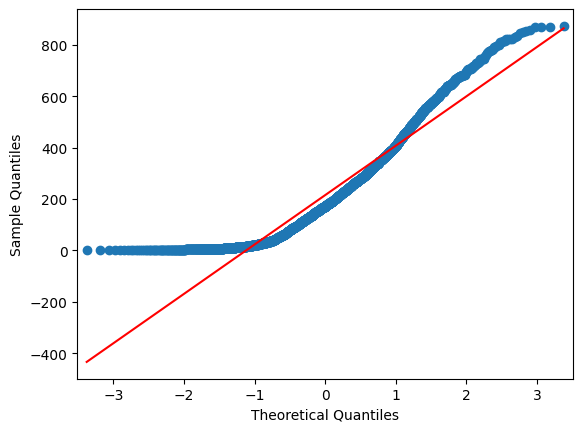

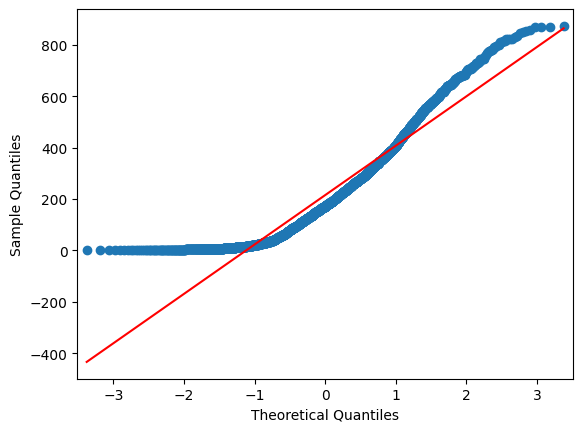

In [ ]:
sm.qqplot(df_summer, line='s')

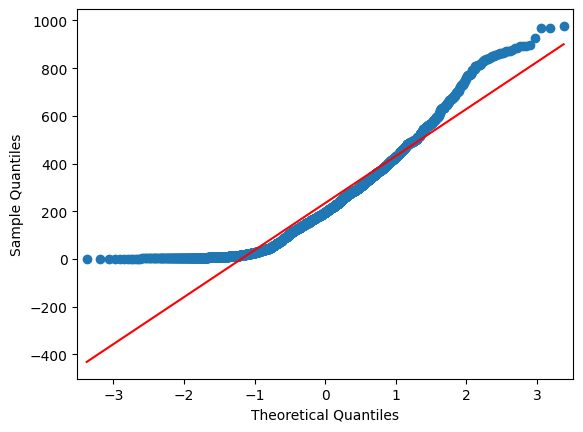

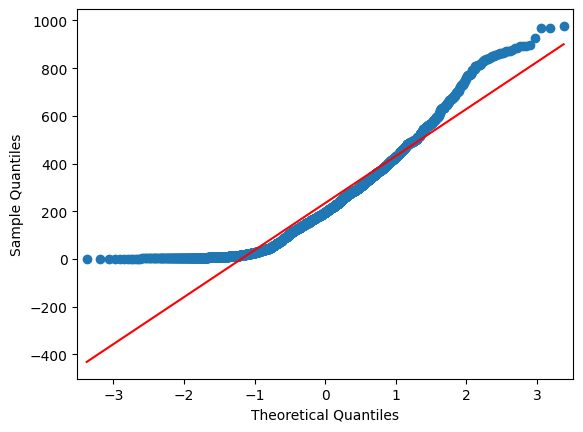

In [ ]:
sm.qqplot(df_fall, line='s')

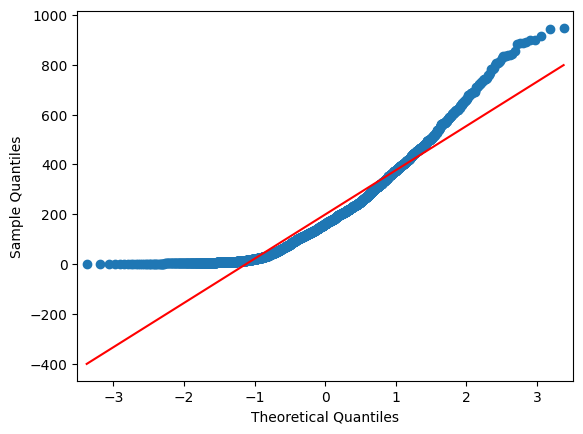

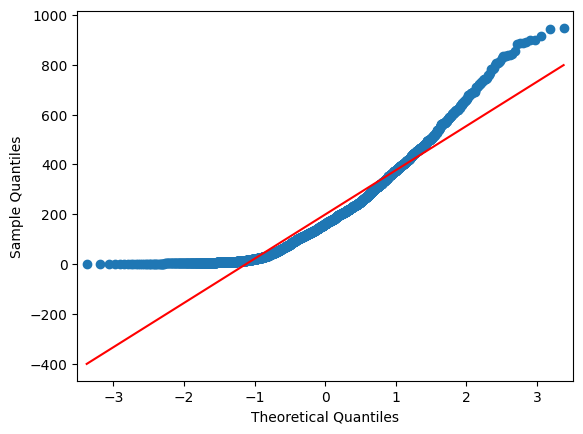

In [ ]:
sm.qqplot(df_winter, line='s')

In [ ]:
from scipy.stats import shapiro
print(shapiro(df["count"]))
print(shapiro(df_spring))
print(shapiro(df_summer ))
print(shapiro(df_fall))
print(shapiro(df_winter))

ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)
ShapiroResult(statistic=0.8087388873100281, pvalue=0.0)
ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39)
ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36)
ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
levene(df_spring , df_summer , df_fall, df_winter )

NameError: name 'levene' is not defined

In [ ]:
stat, p_value = f_oneway(df_spring , df_summer , df_fall, df_winter )
print(p_value)


alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

6.164843386499654e-149
Reject the null hypothesis


In [ ]:
stat, p_value = kruskal(df_spring , df_summer , df_fall, df_winter )
print(p_value)


alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

In [ ]:
df_spring = df[df["season"] ==1]["registered"]
df_summer = df[df["season"] ==2]["registered"]
df_fall = df[df["season"] ==3]["registered"]
df_winter = df[df["season"] ==4]["registered"]

In [ ]:
stat, p_value = f_oneway(df_spring , df_summer , df_fall, df_winter )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

1.8882994650328087e-106
Reject the null hypothesis


In [ ]:
stat, p_value = kruskal(df_spring , df_summer , df_fall, df_winter )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

KruskalResult(statistic=542.9283509737561, pvalue=2.3698212326776174e-117)

In [ ]:
df_spring = df[df["season"] ==1]["casual"]
df_summer = df[df["season"] ==2]["casual"]
df_fall = df[df["season"] ==3]["casual"]
df_winter = df[df["season"] ==4]["casual"]

In [ ]:
stat, p_value = f_oneway(df_spring , df_summer , df_fall, df_winter )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

F_onewayResult(statistic=344.6605621917358, pvalue=7.937798855774506e-214)

In [ ]:
stat, p_value = kruskal(df_spring , df_summer , df_fall, df_winter )
print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

KruskalResult(statistic=1537.3706788901238, pvalue=0.0)

In [ ]:
pd.crosstab(df["weather"], df["season"], margins = True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [ ]:
from scipy.stats import chi2_contingency
observed = [[1759, 1801, 1930,1702], [715, 708,604,807], [211,224,199,225],[1,0,0,0]]
stat, p_value, a,b = chi2_contingency(observed)

print(p_value)

alpha = 0.05 # Significance level
if p_value < alpha:
  decision = "Reject the null hypothesis"
else:
  decision ="Fail to reject the null hypothesis"
print(decision)

1.5499250736864862e-07
Reject the null hypothesis


In [ ]:
df["count"].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64>

<Axes: ylabel='registered'>

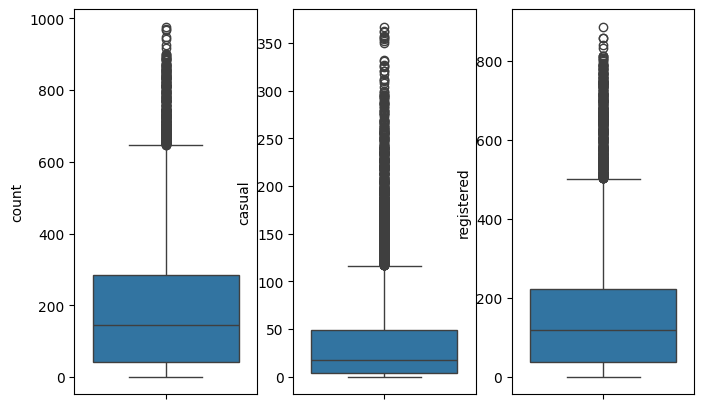

In [ ]:
plt.figure(figsize= (8,5))
plt.subplot(1,3,1)
sns.boxplot(df["count"])

plt.subplot(1,3,2)
sns.boxplot(df["casual"])

plt.subplot(1,3,3)
sns.boxplot(df["registered"])



<Axes: ylabel='registered'>

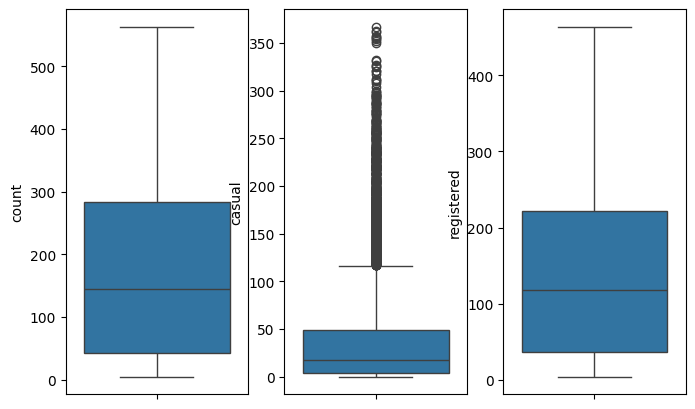

In [ ]:
import numpy as np
df_clip = df.copy()
df_clip["count"] = np.clip(df_clip["count"], df_clip["count"].quantile(0.05), df_clip["count"].quantile(0.95))
df["count"] = df_clip["count"]

df_clip["casual"] = np.clip(df_clip["casual"], df_clip["casual"].quantile(0.05), df_clip["count"].quantile(0.95))
df["casual"] = df_clip["casual"]

df_clip["registered"] = np.clip(df_clip["registered"], df_clip["registered"].quantile(0.05), df_clip["registered"].quantile(0.95))
df["registered"] = df_clip["registered"]

plt.figure(figsize= (8,5))
plt.subplot(1,3,1)
sns.boxplot(df["count"])

plt.subplot(1,3,2)
sns.boxplot(df["casual"])

plt.subplot(1,3,3)
sns.boxplot(df["registered"])



<Axes: ylabel='registered'>

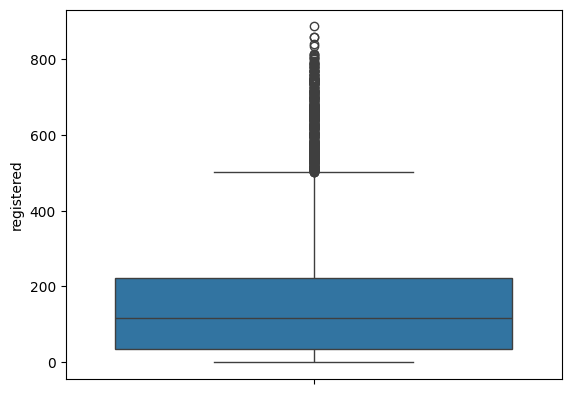